<a href="https://colab.research.google.com/github/JarekMaleszyk/data-science-project-sandbox/blob/main/SEEDS_kmeans_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LinearRegression

Charytanowicz,Magorzata, Niewczas,Jerzy, Kulczycki,Piotr, Kowalski,Piotr, and Lukasik,Szymon. (2012). Seeds. UCI Machine Learning Repository. https://doi.org/10.24432/C5H30K.

https://archive.ics.uci.edu/dataset/236/seeds

In [15]:
columns = ["area", "perimeter", "compactness", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove", "class"]
df = pd.read_csv('/content/seeds_dataset.txt', header=None, sep="\t+", names=columns) # "\s+ any space \t+ any tab"
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


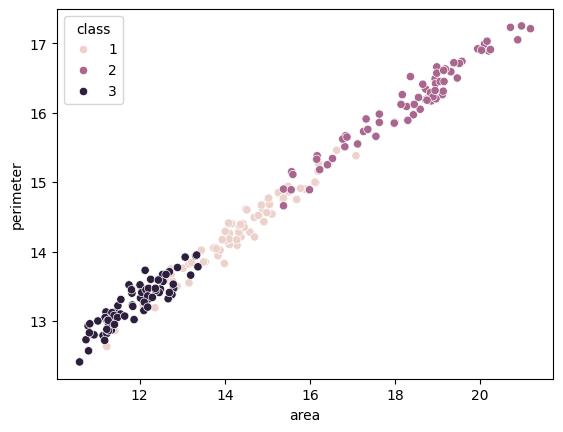

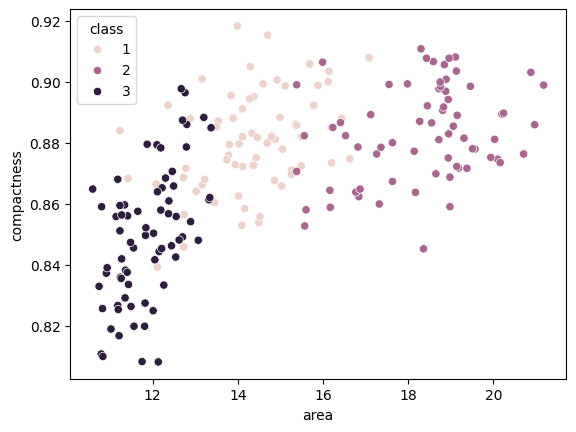

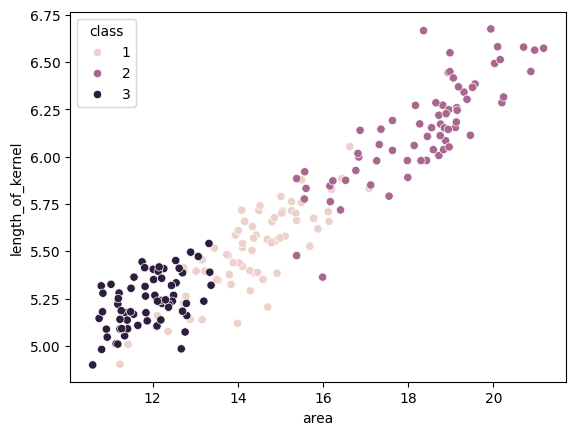

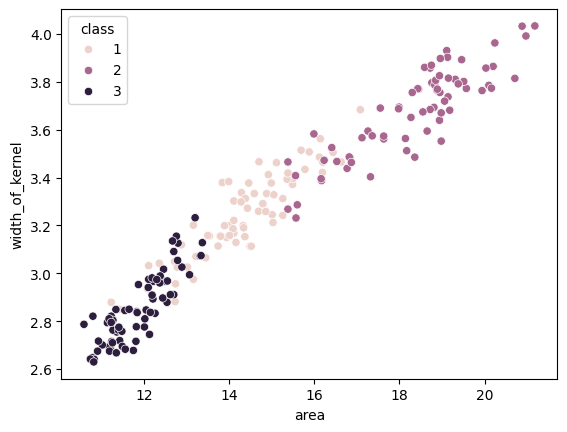

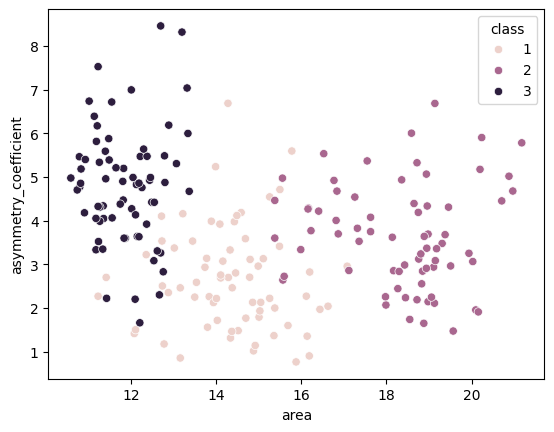

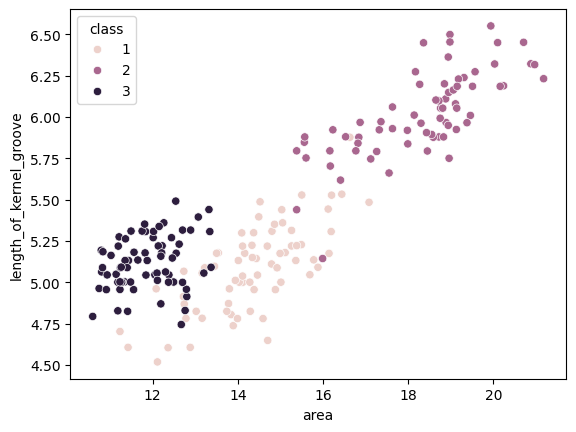

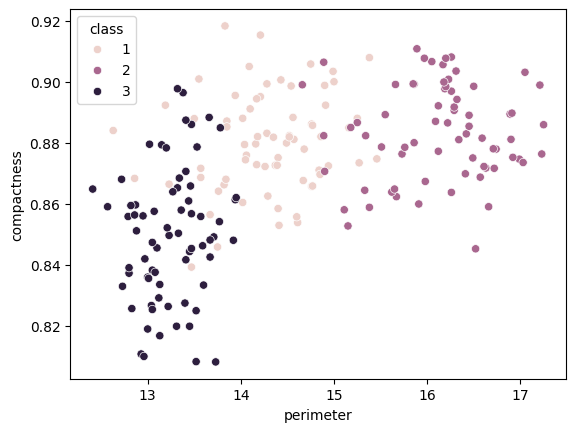

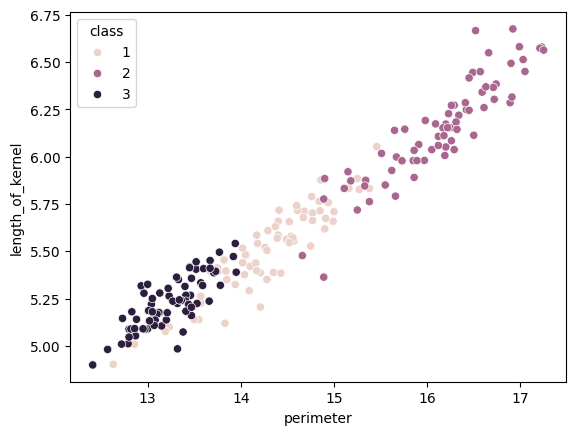

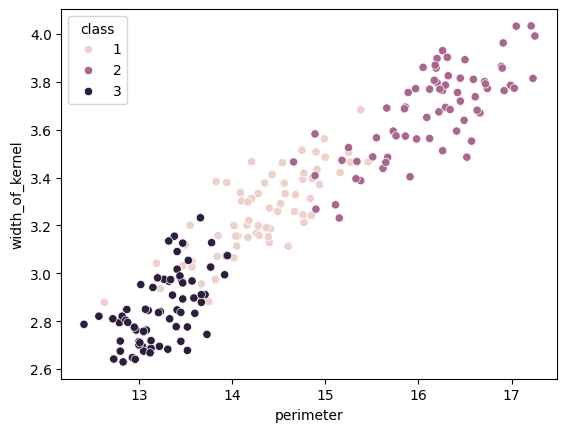

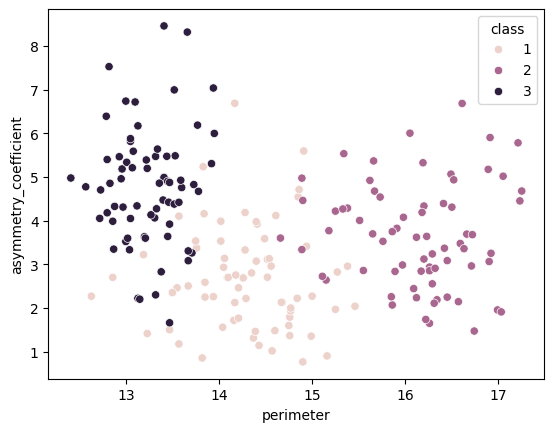

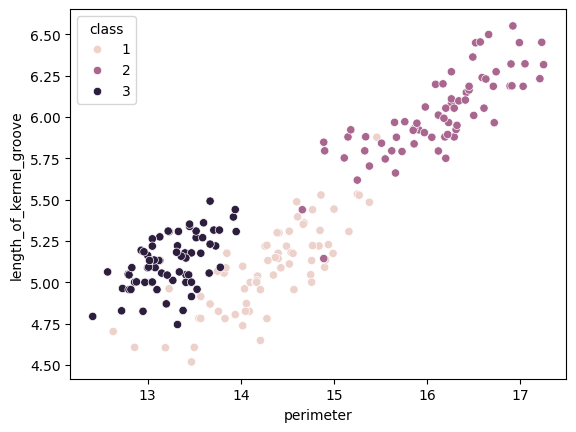

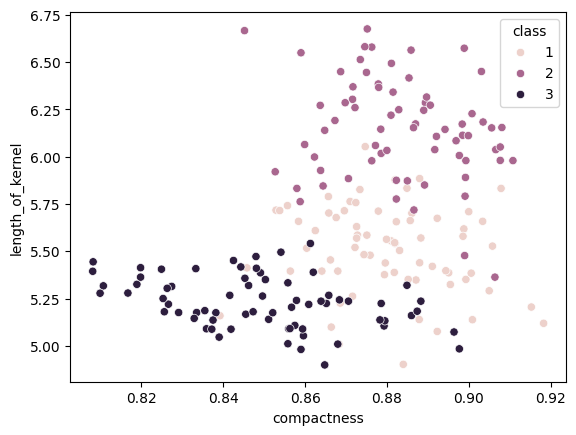

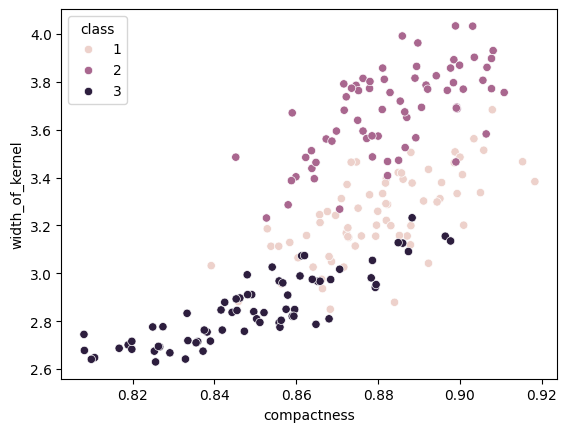

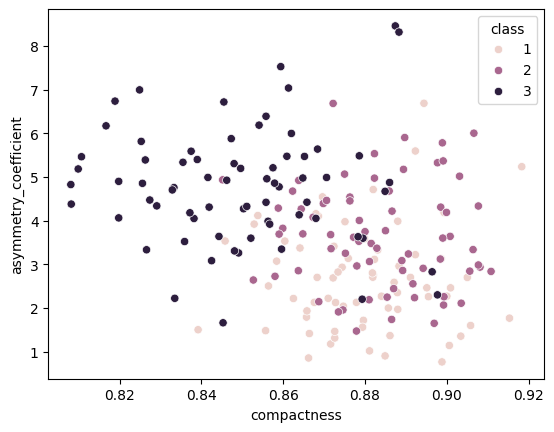

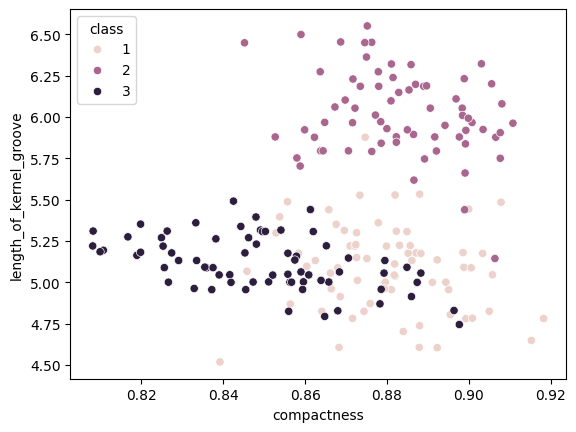

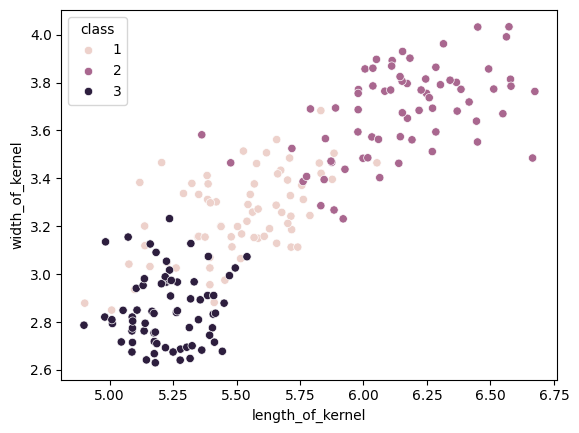

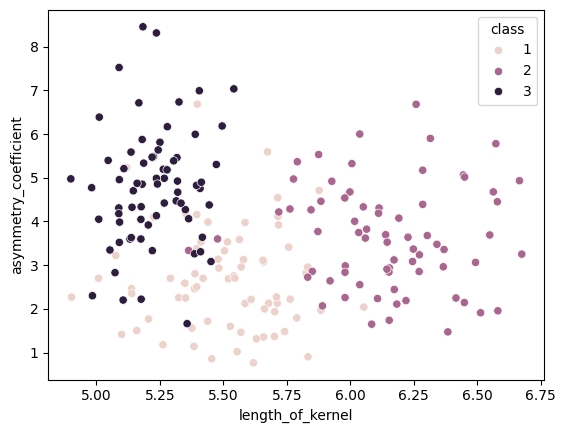

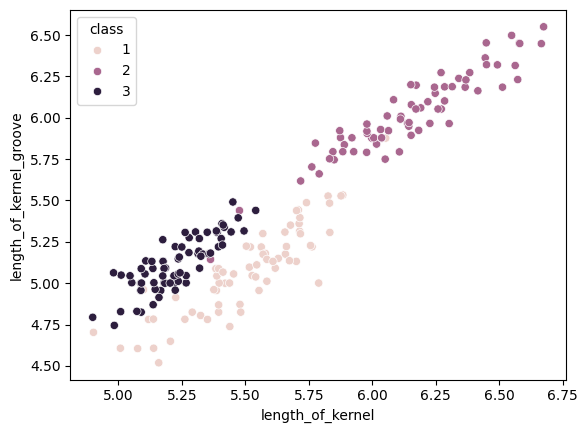

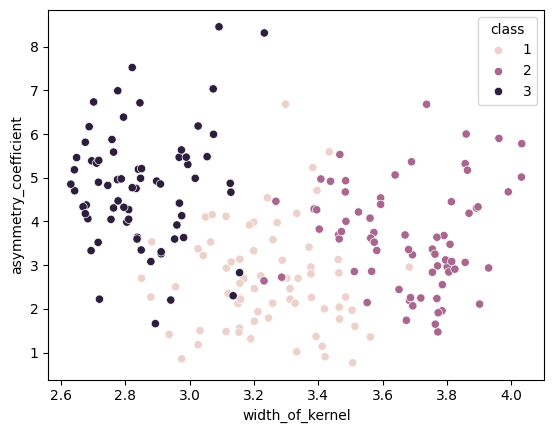

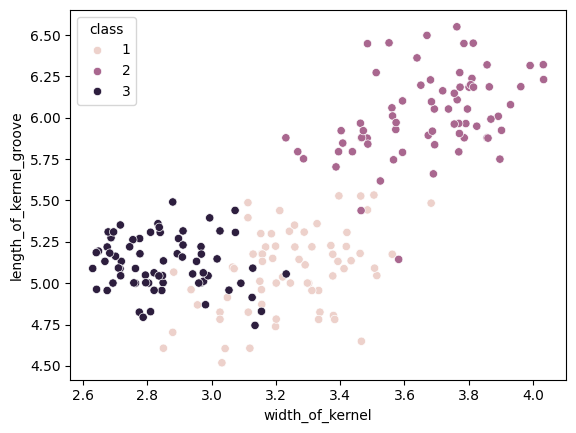

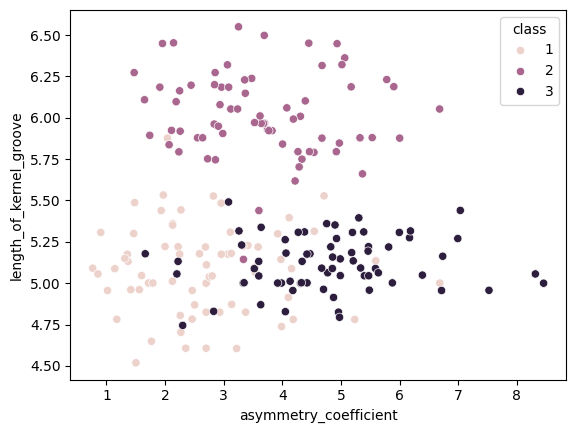

In [16]:
for i in range(len(df.columns) - 1):
  for j in range(i + 1, len(df.columns) - 1):
    x_label = columns[i]
    y_label = columns[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue="class")
    plt.show()

# Clustering

In [17]:
from sklearn.cluster import KMeans

In [19]:
x = "perimeter"
y = "asymmetry_coefficient"
X = df[[x, y]].values

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [23]:
clusters = kmeans.labels_

In [24]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int32)

In [25]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

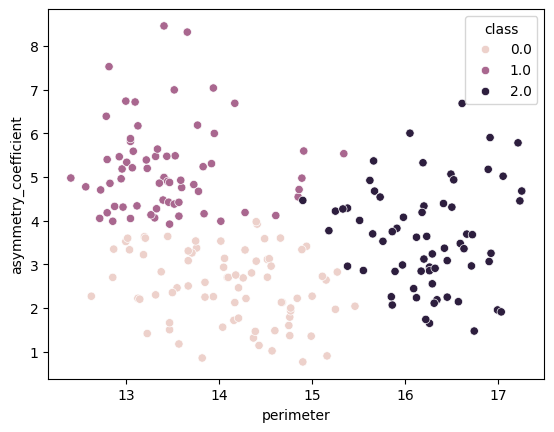

In [26]:
sns.scatterplot(x=x, y=y, data=clusters_df, hue="class")
plt.plot()

[]

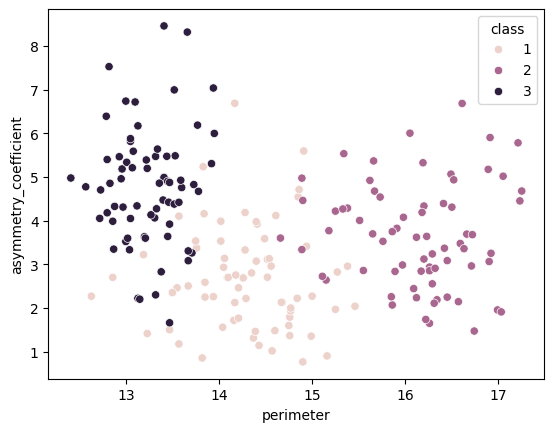

In [27]:
sns.scatterplot(x=x, y=y, data=df, hue="class")
plt.plot()